# Third ML program - SVM example
## importing libraries and load data
### helpful link
https://www.youtube.com/watch?v=zErT-VtYOHk

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.compat.v1 as tf# because of new version
tf.disable_v2_behavior()
% matplotlib inline


Instructions for updating:
non-resource variables are not supported in the long term


## load data

In [2]:
sess=tf.Session()
iris=datasets.load_iris()

## choose two feature sable length and width as classifier feature 

In [3]:
x_vals=np.array([[x[0],x[3]] for x in iris['data']])
y_vals=np.array([1 if y==0 else -1 for y in iris['target']])
train_indices=np.random.choice(len(x_vals),round(len(x_vals)*0.8),replace=False)
test_indices=np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train=x_vals[train_indices]
x_vals_test=x_vals[test_indices]
y_vals_train=y_vals[train_indices]
y_vals_test=y_vals[test_indices]


In [4]:
batch_size=100
x_data=tf.placeholder(shape=[None,2],dtype=tf.float32)
y_target=tf.placeholder(shape=[None,1],dtype=tf.float32)
A=tf.Variable(tf.random_normal(shape=[2,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))
model_output=tf.add(tf.matmul(x_data,A),b)

In [5]:
l2_norm=tf.reduce_sum(tf.square(A))
alpha=tf.constant([0.1])
classification_term=tf.reduce_mean(tf.maximum(0.0,tf.subtract(1.0,tf.multiply(model_output,y_target))))
loss=tf.add(classification_term,tf.multiply(alpha,l2_norm))


In [6]:
prediction=tf.sign(model_output)
accuracy=tf.reduce_mean(tf.cast(tf.equal(prediction,y_target),tf.float32))
my_opt=tf.train.GradientDescentOptimizer(0.01)
train_step=my_opt.minimize(loss)

In [7]:
init=tf.initialize_all_variables()
sess.run(init)
loss_vec=[]
train_accuracy=[]
test_accuracy=[]
for i in range(500):
    rand_index=np.random.choice(len(x_vals_train),size=batch_size)
    rand_x=x_vals_train[rand_index]
    rand_y=np.transpose([y_vals_train[rand_index]])
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    temp_loss=sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    train_accuracy_temp=sess.run(accuracy,feed_dict={x_data:x_vals_test,y_target:np.transpose([y_vals_test])})
    train_accuracy.append(train_accuracy_temp)
    test_accuracy_temp=sess.run(accuracy,feed_dict={x_data:x_vals_test,y_target:np.transpose([y_vals_test])})
    test_accuracy.append(test_accuracy_temp)
    if(i+1)%100==0:
        print('step #'+str(i+1)+' A = '+str(sess.run(A))+' b= '+str(sess.run(b)))
        print('loss is '+str(temp_loss))


Instructions for updating:
Use `tf.global_variables_initializer` instead.
step #100 A = [[-0.13051699]
 [ 0.13318813]] b= [[-0.477428]]
loss is [0.68550986]
step #200 A = [[-0.04541439]
 [-0.18500717]] b= [[-0.42222807]]
loss is [0.5866581]
step #300 A = [[-0.00595763]
 [-0.39793944]] b= [[-0.3712277]]
loss is [0.52510464]
step #400 A = [[ 0.02274513]
 [-0.5665165 ]] b= [[-0.31932762]]
loss is [0.43136603]
step #500 A = [[ 0.04780045]
 [-0.70850956]] b= [[-0.2649275]]
loss is [0.43847072]


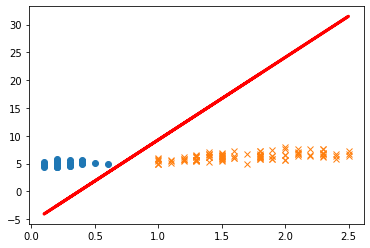

In [8]:
[[a1],[a2]]=sess.run(A)
[[b1]]=sess.run(b)
slope=-a2/a1
y_intercept=b1/a1
x1_vals=[d[1] for d in x_vals]
 
best_fit=[i*slope+y_intercept for i in x1_vals]
setosa_x=[d[1] for i,d in enumerate(x_vals) if y_vals[i]==1]
setosa_y=[d[0] for i,d in enumerate(x_vals) if y_vals[i]==1]
not_setosa_x=[d[1] for i,d in enumerate(x_vals) if y_vals[i]==-1]
not_setosa_y=[d[0] for i,d in enumerate(x_vals) if y_vals[i]==-1]
plt.plot(setosa_x,setosa_y,'o',label='setosa')
plt.plot(not_setosa_x,not_setosa_y,'x',label='Non-setosa')
plt.plot(x1_vals,best_fit,'r-',label='Linear Separator',linewidth=3)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'loss')

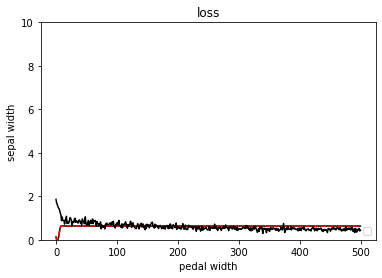

In [9]:
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.title('sepal length vs pedal width')
plt.xlabel('pedal width')
plt.ylabel('sepal width')
plt.plot(train_accuracy,'k-',label='Training Accuracy')
plt.plot(test_accuracy,'r--',label='Test Accuracy')
plt.title('Train and Test Set Accuracy')
plt.plot(loss_vec,'k-',)
plt.title('loss')